# Ravinder's Lesson

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# google sheet: https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0    

#Note: Data has been filtered/changed a bit from orginal form to demonstrate null and outlier handling.

sheet_url = 'https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

In [3]:
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3


In [4]:
df.info()
# have some null values
    # specially in ethnicity
# years code and years code pro are objects
    # need to address this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8152 non-null   int64  
 1   Hobbyist      8152 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8152 non-null   int64  
 5   Ethnicity     3087 non-null   object 
 6   Gender        7575 non-null   object 
 7   YearsCode     8132 non-null   object 
 8   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 573.3+ KB


### Explore factors influencing Compensation
Target = Compensation

### How to handle nulls and Outliers

### How do I handle missing data (nulls) in my dataset?
- Drop the nulls
    - drop columns
    - drop rows
- Impute missing values
    - fillna with 
        - mean of the column
        - median of the column
        - mode of the column
    - Impute using some other algorithms - KNN imputeror simple imputer
        - dont jsut use mean and median but are distance based
            - think of making a profile for diffent peopl
                - Exmaple
                    - this person has been coding this long, get spaid this amount s they must be a hobbyist
- Use algorithms which can handle nulls
    - Ignores missing values
- Boolean flags for missing data

In [5]:
# How many nulls have in each column?
df.isnull().sum()

Respondent         0
Hobbyist           0
Age              923
Age1stCode        16
Comp               0
Ethnicity       5065
Gender           577
YearsCode         20
YearsCodePro      16
dtype: int64

In [6]:
# % values missing in each column
df.isnull().sum()/len(df)*100

Respondent      0.00
Hobbyist        0.00
Age            11.32
Age1stCode      0.20
Comp            0.00
Ethnicity      62.13
Gender          7.08
YearsCode       0.25
YearsCodePro    0.20
dtype: float64

In [7]:
# How many nulls have in each row?
df.isnull().sum(axis=1).value_counts()

1    4444
0    2872
3     486
2     344
4       4
6       1
5       1
dtype: int64

In [8]:
# Drop columns or rows using dropna() based on a threshold

In [9]:
len(df.index)
# I have this many observations

8152

In [10]:
len(df.index)*0.5
# So this is half of how many rows I have

4076.0

In [11]:
# Drop rows using dropna() based on a threshold

# threshold: Require that many non-NA values to survive. 

df.dropna(axis = 1, thresh = 0.5 * len(df.index))
    # if im missing 50% of values im just going to drop it

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,Man,17,13
1,14,Yes,27.00,13,66000,Man,5,1
2,17,Yes,25.00,14,79000,Man,7,3
3,18,Yes,32.00,12,1260000,Man,19,12
4,19,No,24.00,15,83400,Man,9,3
...,...,...,...,...,...,...,...,...
8147,65589,Yes,nan,16,150000,NaN,10,6
8148,65596,Yes,nan,22,70000,NaN,6,4
8149,65602,Yes,nan,13,140000,NaN,15,12
8150,65604,No,nan,13,150000,NaN,7,4


In [12]:
len(df.columns)
# I have 9 columns

9

In [13]:
# Drop rows using dropna() based on a threshold


df.dropna(axis = 0, thresh = 0.5 * len(df.columns))
    # if im missing 50% of values in a columnim just going to drop it
# threshold: only drop when # of nulls in a row is above the threshold value    
    
    # now I have dropped 1 row

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3
...,...,...,...,...,...,...,...,...,...
8147,65589,Yes,nan,16,150000,NaN,NaN,10,6
8148,65596,Yes,nan,22,70000,NaN,NaN,6,4
8149,65602,Yes,nan,13,140000,NaN,NaN,15,12
8150,65604,No,nan,13,150000,NaN,NaN,7,4


In [14]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' funtcion which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [15]:
# use the function on our dataset
df = handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5)
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,Man,17,13
1,14,Yes,27.00,13,66000,Man,5,1
2,17,Yes,25.00,14,79000,Man,7,3
3,18,Yes,32.00,12,1260000,Man,19,12
4,19,No,24.00,15,83400,Man,9,3


In [16]:
df.info()
# now I dont have ethnicity

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8151 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8151 non-null   int64  
 1   Hobbyist      8151 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8151 non-null   int64  
 5   Gender        7575 non-null   object 
 6   YearsCode     8132 non-null   object 
 7   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 573.1+ KB


In [17]:
df.isnull().sum()

Respondent        0
Hobbyist          0
Age             922
Age1stCode       15
Comp              0
Gender          576
YearsCode        19
YearsCodePro     15
dtype: int64

In [18]:
# drop null rows for specific columns only

df = df[df.YearsCode.notnull()]
df = df[df.YearsCodePro.notnull()]
df = df[df.Age1stCode.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8108 non-null   int64  
 1   Hobbyist      8108 non-null   object 
 2   Age           7194 non-null   float64
 3   Age1stCode    8108 non-null   object 
 4   Comp          8108 non-null   int64  
 5   Gender        7534 non-null   object 
 6   YearsCode     8108 non-null   object 
 7   YearsCodePro  8108 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 570.1+ KB


In [19]:
df.isnull().sum()

Respondent        0
Hobbyist          0
Age             914
Age1stCode        0
Comp              0
Gender          574
YearsCode         0
YearsCodePro      0
dtype: int64

In [20]:
# what is the most common/frequent observation in Gender in train dataset?
df.Gender.value_counts()

Man                                                            6630
Woman                                                           746
Non-binary, genderqueer, or gender non-conforming                96
Man;Non-binary, genderqueer, or gender non-conforming            30
Woman;Non-binary, genderqueer, or gender non-conforming          27
Woman;Man                                                         3
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

In [21]:
# take above code and turn into %
df.Gender.value_counts()/len(df)*100

Man                                                           81.77
Woman                                                          9.20
Non-binary, genderqueer, or gender non-conforming              1.18
Man;Non-binary, genderqueer, or gender non-conforming          0.37
Woman;Non-binary, genderqueer, or gender non-conforming        0.33
Woman;Man                                                      0.04
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.02
Name: Gender, dtype: float64

In [22]:
# Fill NaNs with mode

# find the mode
df.Gender.mode()[0]

# fills empy values with the mode
df.Gender.fillna(df.Gender.mode()[0])

df.Gender.value_counts()

Man                                                            6630
Woman                                                           746
Non-binary, genderqueer, or gender non-conforming                96
Man;Non-binary, genderqueer, or gender non-conforming            30
Woman;Non-binary, genderqueer, or gender non-conforming          27
Woman;Man                                                         3
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

In [23]:
# Use skearn simple imputer

from sklearn.impute import SimpleImputer

# defining the imputer object
imp_mode = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')

df1 = pd.DataFrame(imp_mode.fit_transform(df[['Gender']]), 
             columns = ['Gender_imputed'], index = df.index)

# fit and transform on train only!!
#df1 = pd.DataFrame(imp_mode.fit_transform(df[['Gender']]), columns = ['Gender_imputed'], index = df.index)

In [24]:
#merge transformed column(s) with original dataframe
    # more like a SQL style of joining

#pd.merge(df, df1, right_index=True, left_index=True)
# Gender is the original column Gender_imputed is the new, but to drop do this:
df = pd.merge(df, df1, right_index=True, left_index=True).drop(columns=['Gender'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      8108 non-null   int64  
 1   Hobbyist        8108 non-null   object 
 2   Age             7194 non-null   float64
 3   Age1stCode      8108 non-null   object 
 4   Comp            8108 non-null   int64  
 5   YearsCode       8108 non-null   object 
 6   YearsCodePro    8108 non-null   object 
 7   Gender_imputed  8108 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 890.1+ KB


In [26]:
df.isnull().sum()
# now just left with the age

Respondent          0
Hobbyist            0
Age               914
Age1stCode          0
Comp                0
YearsCode           0
YearsCodePro        0
Gender_imputed      0
dtype: int64

In [27]:
df.YearsCode.value_counts()
# reason it is object is because of:
    # More than 50 years
    # Less than 1 year

10                    632
20                    485
6                     424
8                     420
7                     410
5                     390
15                    381
12                    353
25                    299
9                     278
4                     256
11                    232
14                    230
16                    219
13                    219
30                    213
3                     211
18                    195
17                    186
22                    168
40                    160
35                    137
23                    136
21                    125
2                     122
19                    118
24                    111
26                     95
38                     85
27                     72
28                     67
37                     65
36                     58
32                     57
34                     55
29                     45
42                     44
1                      42
33          

In [28]:
df.YearsCodePro.value_counts()
# reason it is object is because of:
    # More than 50 years
    # Less than 1 year

3                     727
5                     672
2                     667
4                     562
10                    464
6                     459
7                     406
1                     385
8                     374
20                    324
Less than 1 year      316
15                    299
12                    266
9                     201
13                    180
11                    178
14                    151
25                    150
16                    148
22                    110
18                     97
21                     93
30                     87
19                     83
23                     83
17                     72
24                     71
26                     50
27                     49
35                     44
28                     40
40                     37
38                     31
34                     26
31                     24
32                     24
33                     23
29                     22
36          

In [29]:
df.Age1stCode.value_counts()
# reason it is object is because of:
    # More than 85 years
    # Younger than 5 years

12                      889
13                      710
15                      689
14                      675
10                      656
16                      650
18                      602
11                      387
17                      383
8                       351
19                      324
9                       235
20                      215
7                       182
21                      142
25                      117
22                      114
6                       105
23                       99
24                       89
26                       75
5                        57
27                       56
Younger than 5 years     55
30                       53
28                       45
29                       32
31                       25
35                       19
33                       18
32                       12
34                        8
36                        6
39                        6
40                        6
38                  

In [30]:
df.replace('Younger than 5 years',4, inplace=True)
df.replace('Older than 85',85, inplace=True)
df.replace('More than 50 years',50, inplace=True)
df.replace('Less than 1 year',0, inplace=True)

In [31]:
df['Age1stCode'] = df.Age1stCode.astype('int64')
df['YearsCode'] = df.YearsCode.astype('int64')
df['YearsCodePro'] = df.YearsCodePro.astype('int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      8108 non-null   int64  
 1   Hobbyist        8108 non-null   object 
 2   Age             7194 non-null   float64
 3   Age1stCode      8108 non-null   int64  
 4   Comp            8108 non-null   int64  
 5   YearsCode       8108 non-null   int64  
 6   YearsCodePro    8108 non-null   int64  
 7   Gender_imputed  8108 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 890.1+ KB


In [33]:
from sklearn.impute import KNNImputer

#Use numeric columns that you want to use for imputation
X_numeric = df[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']]

# define the thing
imputer = KNNImputer(n_neighbors=1)
    # define the neighbors

# fit the thing (or fit and use with fit_transform) only on train!
imputed = imputer.fit_transform(X_numeric)
    # fit and transform it
imputed

array([[36., 12., 17., 13.],
       [27., 13.,  5.,  1.],
       [25., 14.,  7.,  3.],
       ...,
       [28., 13., 15., 12.],
       [26., 13.,  7.,  4.],
       [41., 15., 25., 20.]])

In [34]:
pd.DataFrame(imputed).isnull().sum()
# Perfect

0    0
1    0
2    0
3    0
dtype: int64

In [35]:
imputed = pd.DataFrame(imputed, index = df.index)
# columns are in the same order as above:
    #X_numeric = df[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']]
imputed.head()

,0,1,2,3
0,36.00,12.00,17.00,13.00
1,27.00,13.00,5.00,1.00
2,25.00,14.00,7.00,3.00
3,32.00,12.00,19.00,12.00
4,24.00,15.00,9.00,3.00


In [36]:
# can rename the columns if you want
df['Age'] = imputed[[0]]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      8108 non-null   int64  
 1   Hobbyist        8108 non-null   object 
 2   Age             8108 non-null   float64
 3   Age1stCode      8108 non-null   int64  
 4   Comp            8108 non-null   int64  
 5   YearsCode       8108 non-null   int64  
 6   YearsCodePro    8108 non-null   int64  
 7   Gender_imputed  8108 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 890.1+ KB


### Outliers
- Data point(s) that differs significantly from other observations
- Could be due to chance, measurement errors, transcription error, sampling error/bias,

Question to ask:
- Is the outlier part of population that I want to explore/model?

Text(0.5, 1.0, 'Compensation')

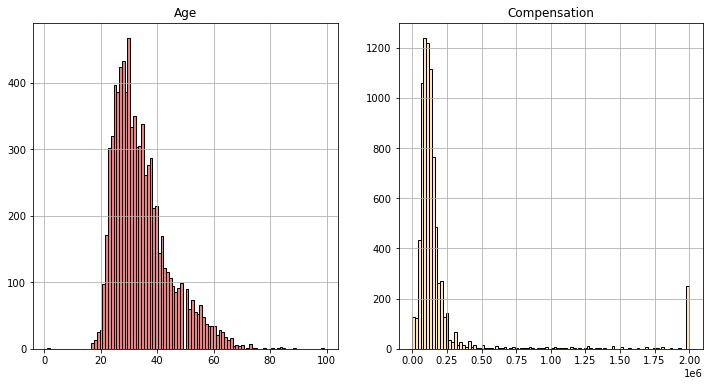

In [38]:
# plot histograms from Age and Compensation

plt.figure(figsize = (12,6))

plt.subplot(121)
df.Age.hist(bins = 100, color='lightcoral', ec='black')
plt.title('Age')

plt.subplot(122)
df.Comp.hist(bins = 100, color='moccasin', ec='black')
plt.title('Compensation')

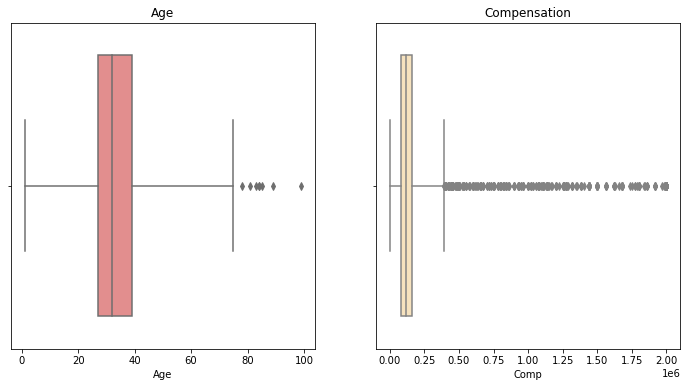

In [39]:

# Boxplot for Age and Compensation

plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(x = 'Age', data = df, whis = 3, color='lightcoral')
plt.title('Age')

plt.subplot(122)
plt.title('Compensation')
sns.boxplot(x = 'Comp', data = df, whis = 3, color='moccasin');

### Handling Outliers:
- Use domain knowledge/business rules to have cut-offs
- Use IQR method to exclude outliers
- Cap/Trim max value
- transformation
- Impute new value (if you know outlier is a mistake)

In [40]:

# Calculate q1, q3 and iqr for Age
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
iqr = q3 - q1
k = 3

# calculate upper and lower ranges
upper_bound_Age =  q3 + k * iqr
lower_bound_Age =  q1 - k * iqr

print(f'My Upper Bound Age is: ', upper_bound_Age)
print(' ')
print(f' My Lower Bound Age is: ', lower_bound_Age)

My Upper Bound Age is:  75.0
 
 My Lower Bound Age is:  -9.0


In [41]:
# Calculate q1, q3 and iqr for Comp

q1 = df.Comp.quantile(0.25)
q3 = df.Comp.quantile(0.75)
iqr = q3 - q1
k = 3

# calculate upper and lower ranges
upper_bound_Comp = q3 + k * iqr
lower_bound_Comp = q1 - k * iqr

print(f'My Upper Bound Comp is: ', upper_bound_Comp)
print(' ')
print(f' My Lower Bound Comp is: ', lower_bound_Comp)

My Upper Bound Comp is:  391000.0
 
 My Lower Bound Comp is:  -148000.0


In [42]:

# Filter dataframe using multiple conditions

df = df[(df.Age < upper_bound_Age) & (df.Comp < upper_bound_Comp)]
# 7548 rows now

In [43]:
# Cap the limit

# df['column'] = np.where(this_is_true, do_this, else_do_that)
    # sets a condition and if true sets this value if not sets a different value

df.Comp_capped = df.Comp = np.where(df.Comp > 1_000_000, df.Comp == 1_000_000, df.Comp)

# this is my condition
    # df.Comp > 1_000_000
# if it is not met do this
    # df.Comp == 1_000_000

In [44]:
df.shape

(7548, 8)

Text(0.5, 1.0, 'Compensation')

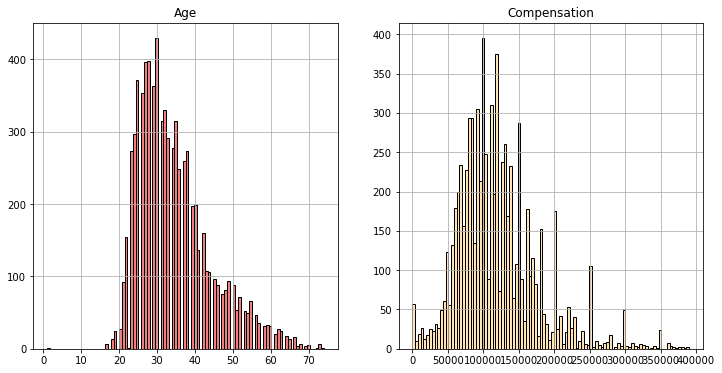

In [47]:
plt.figure(figsize = (12,6))

plt.subplot(121)
df.Age.hist(bins = 100, color='lightcoral', ec='black')
plt.title('Age')

plt.subplot(122)
df.Comp.hist(bins = 100, color='moccasin', ec='black')
plt.title('Compensation')

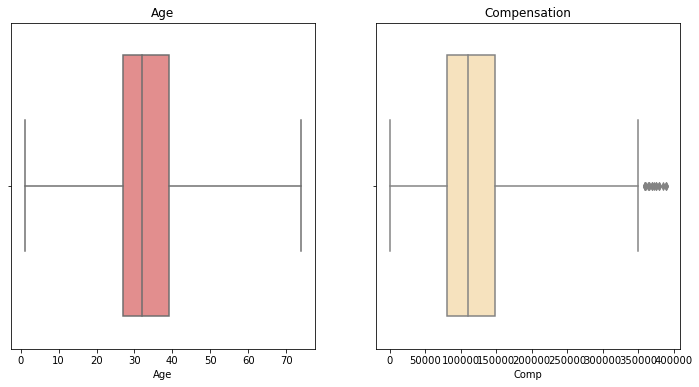

In [46]:
plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(x = 'Age', data = df, whis = 3, color='lightcoral')
plt.title('Age')

plt.subplot(122)
plt.title('Compensation')
sns.boxplot(x = 'Comp', data = df, whis = 3, color='moccasin');

# Data Wrangling: Acquisition & Preparation
In this lesson, we'll be acquiring and preparing some data from our SQL database.

## Learning Goals
- Acquire a sample of data from SQL.
- Identify null values, which nulls are 'deal-breakers', i.e. rows removed, which nulls should be represented by 0, and which should be replaced by a value from other methods, such as mean.
- Identify outliers and decide what to do with them, if anything (remove, keep as-is, replace).
- Data Structure: Aggregate as needed so that every row is an observation and each column is a variable (1 variable and not a measure).

## Acquire & Summarize
- We'll start with some standard imports:

In [45]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare

ModuleNotFoundError: No module named 'acquire'

Note that we have several modules already in place: 
    - `acquire`
    - `summarize`
    - `prepare` 
We'll use these to work with our data, and will explain their contents as we go.

The acquire module has a function named get_mallcustomer_data that will acquire our data from the SQL database. The data comes from the customers table inside the mall_customers database.

In [ ]:
df = acquire.get_mallcustomer_data()

df.head()

Next, we'll use the `df_summary` function from the `summarize` module to get a broad overview of our data.

In [ ]:
summarize.df_summary(df)

## Filter Columns and Missing Values
We will now prepare our data using the `data_prep` function from the `prepare` module.

The `data_prep` function will do the following:

- Remove unwanted columns:

In [ ]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

- Remove rows & columns based on a minimum percentage of values available for each row/columns:

In [ ]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

- Putting it all together, we have:

In [ ]:
def data_prep(df, cols_to_remove=[], prop_required_column=.5, prop_required_row=.75):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

In [ ]:
df = prepare.data_prep(
    df,
    cols_to_remove=[],
    prop_required_column=.6,
    prop_required_row=.75
)

In [ ]:
df.head()

## Outliers
Now let's visualize the distribution of our data:

In [ ]:
df.hist(figsize=(24, 10), bins=20)

### IQR
One way we can detect and remove outliers is using the Interquartile Range or IQR.

` Interquartile Range, a.k.a. the midspread, middle 50%, or H-spread, is a measure of variability, based on dividing a data set into quartiles, or 4 equal parts.`

The data is sorted by value and then divided so that an equal number of records are in each quartile. Each quartile is split into 25% chunks. The first quartile is the bottom 25% and is denoted by Q1 at the 25th percentile mark. The second quartile, or median, is the range between the 25th and 50th percentile, and is denoted by Q2 in the middle of the range at 50%. The third quartile is the 50th to 75th percentile and is denoted by Q3 at the 75% mark. The fourth quartile comprises the upper 25% from the 75th to the 100th percentile, this is denoted as Q4 at the maximum value in the dataset.

IQR is computed by taking the difference between Q1 and Q3: Q3-Q1 = IQR Outliers are computed through the following formula, where 1.5 is the textbook weight given to determine where your outliers will be determined. A higher value will give the more extreme outliers.

1. lower outliers: Q1−(k × IQR)
2. upper outliers: Q3+(k×IQR)

While 1.5 is a value commonly given to k, it is not uncommon to see values as high as 3 for detecting outliers.

For our data, it looks like we won't have any lower outliers, so we'll just worry about detecting the upper outliers.

Here we'll write a couple of functions that will detect upper outliers for us. In addition to detecting upper outliers, the `get_upper_outliers` function will also give us a number for each data point that indicates how far away each outlier is from the upper bound.

To see this data, we'll add a new column to the data frame that indicates the outliers in the numeric columns.

In [ ]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

df.head()

Now we can see what the outliers in our data look like:

In [ ]:
outlier_cols = [col for col in df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

With our data, it looks like we have only one column with outliers, and the outliers in that column are 4.25 above the upper bound.

We'll decide that these outliers are acceptable, and leave them in the dataset.

# Further Reading
- Outliers: To Drop or not to Drop
    - https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
- Tidy Data
    - Example Notebook
        - https://github.com/nickhould/tidy-data-python
    - Explanatory Blog Post
        - http://www.jeannicholashould.com/tidy-data-in-python.html
